## **Multi-Label Image Classification on Movies Poster using CNN**

We are trying to identify the genre of movies from their posters using Deep Learning methods 

**Importing necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

**Cloning the Datasets from GitHub link**

In [2]:
!git clone https://github.com/laxmimerit/Movies-Poster_Dataset.git

Cloning into 'Movies-Poster_Dataset'...
remote: Enumerating objects: 7873, done.
remote: Total 7873 (delta 0), reused 0 (delta 0), pack-reused 7873
Receiving objects: 100% (7873/7873), 246.59 MiB | 44.28 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Checking out files: 100% (7871/7871), done.


In [3]:
Metadata=pd.read_csv('/content/Movies-Poster_Dataset/train.csv')

In [4]:
Metadata.shape

(7254, 27)

In [5]:
Metadata.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


**Converting each image to a fixed size of 350×350. The values in the images are between 0 to 255. Neural networks work well with values between 0 to 1. Normalizing the values by dividing all of the values by 255.**

In [6]:
image_height=350
image_width=350
x=[]
for i in tqdm(range(Metadata.shape[0])):
  path = '/content/Movies-Poster_Dataset/Images/' + Metadata['Id'][i] + '.jpg'
  img= image.load_img(path, target_size=(image_height, image_width, 3))
  img=image.img_to_array(img)
  img= img/255.0
  x.append(img)
 
x=np.array(x)

100%|██████████| 7254/7254 [00:27<00:00, 262.61it/s]


**x is a numpy array which has 7254 images. Each image has the size 350×350 and is 3 dimensional as the image is a RGB coloured image.**

In [7]:
x.shape

(7254, 350, 350, 3)

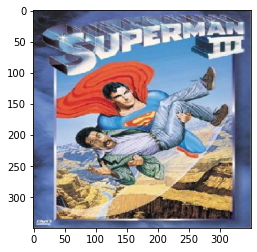

In [8]:
plt.imshow(x[10])

In [9]:
Metadata['Genre'][10]

"['Action', 'Comedy', 'Sci-Fi']"

In [10]:
data_count=Metadata.iloc[:,2:].sum()

In [11]:
data_count

Action         1343
Adventure       870
Animation       244
Biography       441
Comedy         2900
Crime          1176
Documentary     652
Drama          3619
Family          434
Fantasy         467
History         224
Horror          503
Music           305
Musical          97
Mystery         454
N/A              10
News             21
Reality-TV        2
Romance        1334
Sci-Fi          399
Short            46
Sport           221
Thriller        918
War             144
Western          50
dtype: int64

## **Visualizing the Occurances of a Particular Genre**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


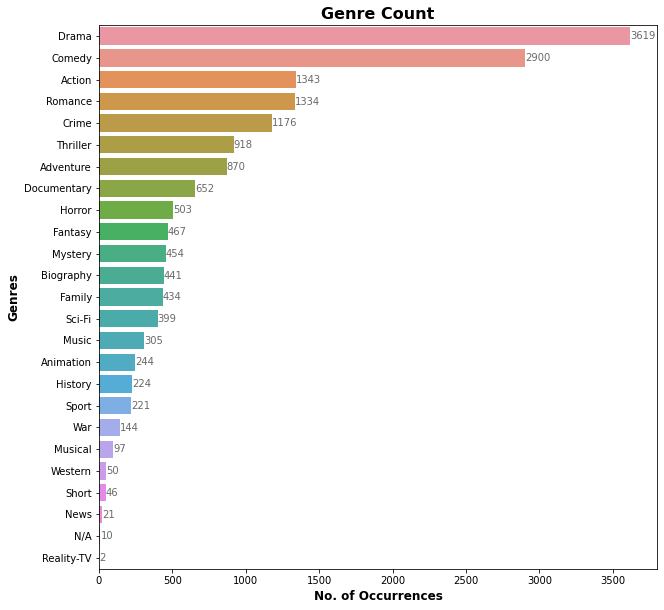

In [12]:
plt.figure(figsize=(10,10)) 

g = data_count.nlargest(n = 50) 
ax = sns.barplot(g.values, g.index, alpha=1)

plt.title("Genre Count", weight='bold', fontsize=16)
plt.ylabel('Genres', weight='bold', fontsize=12)
plt.xlabel('No. of Occurrences', weight='bold', fontsize=12)

totals = []

for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_width()+.5, i.get_y()+.55, \
            str(round((i.get_width()))), fontsize=10, color='dimgrey')

plt.show()

Now preparing the dataset for splitting. We have already got the feature space in **x**. Now we will have to make the target in **y**. For that, we will drop the Id and Genre columns from data.

In [13]:
y= Metadata.drop(['Id','Genre'], axis = 1)
y= y.to_numpy()
y.shape

(7254, 25)

 **Spliting the data into training and testing giving a test_size = 0.30 will keep 30% data for testing and 70% data will be used for training the model. Random_state controls the shuffling applied to the data before applying the split.**

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 20, test_size=0.30)

In [15]:
x_train[0].shape

(350, 350, 3)

## **Building a CNN Model**

In [16]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape = x_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(25, activation='softmax'))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 348, 348, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 348, 348, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 174, 174, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 174, 174, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 172, 172, 32)      4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 172, 172, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 86, 86, 32)        0

## **Compiling and Fitting the Model**

In [31]:
model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.BinaryCrossentropy(), metrics=[keras.metrics.BinaryAccuracy()])

In [32]:
GenrePred = model.fit(x_train, y_train, epochs=10, batch_size = 32, validation_data=(x_test, y_test))

Epoch 1/10
159/159 [==============================] - 13s 72ms/step - loss: 0.2373 - binary_accuracy: 0.9098 - val_loss: 0.2345 - val_binary_accuracy: 0.9126
Epoch 2/10
159/159 [==============================] - 11s 71ms/step - loss: 0.2343 - binary_accuracy: 0.9101 - val_loss: 0.2320 - val_binary_accuracy: 0.9119
Epoch 3/10
159/159 [==============================] - 11s 71ms/step - loss: 0.2318 - binary_accuracy: 0.9107 - val_loss: 0.2356 - val_binary_accuracy: 0.9099
Epoch 4/10
159/159 [==============================] - 11s 71ms/step - loss: 0.2299 - binary_accuracy: 0.9118 - val_loss: 0.2367 - val_binary_accuracy: 0.9127
Epoch 5/10
159/159 [==============================] - 11s 71ms/step - loss: 0.2277 - binary_accuracy: 0.9122 - val_loss: 0.2300 - val_binary_accuracy: 0.9133
Epoch 6/10
159/159 [==============================] - 11s 71ms/step - loss: 0.2248 - binary_accuracy: 0.9131 - val_loss: 0.2273 - val_binary_accuracy: 0.9137
Epoch 7/10
159/159 [==============================] 

# **Visualizing Model Accuracy**

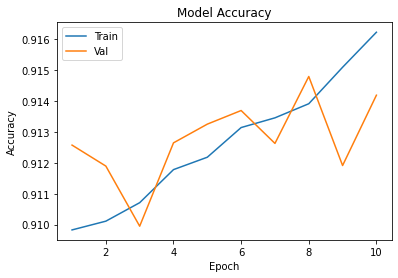

In [33]:
def plot_learningCurve(GenrePred, epoch):
# Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, GenrePred.history['binary_accuracy'])
  plt.plot(epoch_range, GenrePred.history['val_binary_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

plot_learningCurve(GenrePred, 10)

# **Visualizing Model Loss**

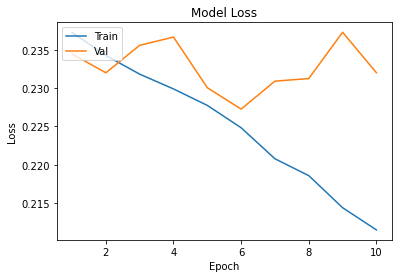

In [34]:
def plot_learningCurve(GenrePred, epoch):
# Plot training & validation loss values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, GenrePred.history['loss'])
  plt.plot(epoch_range, GenrePred.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

plot_learningCurve(GenrePred, 10)

## **Testing the Model on Some Movie Posters**

Here, **model.predict()** will give us the probabilities for all the 25 classes. But we are interested in only the top 3 classes. So, we will sort the probabilities using np.argsort() and then select the classes having the top 3 probabilities.

In [22]:
img = image.load_img('black-panther-web.jpg', target_size=(image_height, image_width, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, image_height, image_width, 3)

classes = Metadata.columns[2:]
y_prob = model.predict(img)
top3 = np.argsort(y_prob[0])[:-4:-1]

for i in range(3):
  print(classes[top3[i]])

FileNotFoundError: ignored

In [ ]:
img = image.load_img('1917.jpg', target_size=(image_height, image_width, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, image_height, image_width, 3)

classes = Metadata.columns[2:]
y_prob = model.predict(img)
top3 = np.argsort(y_prob[0])[:-4:-1]

for i in range(3):
  print(classes[top3[i]])

In [ ]:
img = image.load_img('Coolie.jpg', target_size=(image_height, image_width, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, image_height, image_width, 3)

classes = Metadata.columns[2:]
y_prob = model.predict(img)
top3 = np.argsort(y_prob[0])[:-4:-1]

for i in range(3):
  print(classes[top3[i]])

In [ ]:
img = image.load_img('Hollywood.jpg', target_size=(image_height, image_width, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, image_height, image_width, 3)

classes = Metadata.columns[2:]
y_prob = model.predict(img)
top3 = np.argsort(y_prob[0])[:-4:-1]

for i in range(3):
  print(classes[top3[i]])

In [ ]:
img = image.load_img('Lalaland.jpg', target_size=(image_height, image_width, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, image_height, image_width, 3)

classes = Metadata.columns[2:]
y_prob = model.predict(img)
top3 = np.argsort(y_prob[0])[:-4:-1]

for i in range(3):
  print(classes[top3[i]])

In [ ]:
img = image.load_img('Parasite.jpg', target_size=(image_height, image_width, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, image_height, image_width, 3)

classes = Metadata.columns[2:]
y_prob = model.predict(img)
top3 = np.argsort(y_prob[0])[:-4:-1]

for i in range(3):
  print(classes[top3[i]])

In [ ]:
img = image.load_img('joker.jpg', target_size=(image_height, image_width, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, image_height, image_width, 3)

classes = Metadata.columns[2:]
y_prob = model.predict(img)
top3 = np.argsort(y_prob[0])[:-4:-1]

for i in range(3):
  print(classes[top3[i]])

In [ ]:
img = image.load_img('moonlight.jpg', target_size=(image_height, image_width, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, image_height, image_width, 3)

classes = Metadata.columns[2:]
y_prob = model.predict(img)
top3 = np.argsort(y_prob[0])[:-4:-1]

for i in range(3):
  print(classes[top3[i]])

In [ ]:
img = image.load_img('us-1.jpg', target_size=(image_height, image_width, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, image_height, image_width, 3)

classes = Metadata.columns[2:]
y_prob = model.predict(img)
top3 = np.argsort(y_prob[0])[:-4:-1]

for i in range(3):
  print(classes[top3[i]])

In [38]:
from keras.models import load_model
model.save("model1.h5")
loaded_model = load_model("model1.h5")
loss, accuracy = loaded_model.evaluate(x_test, y_test)

69/69 [==============================] - 18s 24ms/step - loss: 0.2320 - binary_accuracy: 0.9142


In [23]:
!pip install --quiet gradio

     |████████████████████████████████| 1.4MB 6.5MB/s 
     |████████████████████████████████| 215kB 42.2MB/s 
     |████████████████████████████████| 1.9MB 43.2MB/s 
     |████████████████████████████████| 962kB 36.5MB/s 
     |████████████████████████████████| 71kB 8.5MB/s 
     |████████████████████████████████| 3.2MB 45.7MB/s 


In [24]:
import gradio as gr

In [27]:
classes = Metadata.columns[2:]
labels = Metadata.columns[2:].to_list()
labels

['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'N/A',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Thriller',
 'War',
 'Western']

In [35]:
def classify_genre(img):
  img = img/255.0
  img = img.reshape(1, 350, 350, 3)
  y_prob = model.predict(img)[0]
  return {labels[i] : float(y_prob[i]) for i in range(25)}

In [36]:
image = gr.inputs.Image(shape=(350,350))
label = gr.outputs.Label(num_top_classes=3)

gr.Interface(fn = classify_genre, inputs= image, outputs = label, capture_session=True, title= 'Movie  Genre Prediction', 
             description= '      Predicting the Top 3 Genre of the Movies as well the corresponding percentage of the probabilities judging from thier poster').launch(debug = 'True')

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://30124.gradio.app
Interface loading below...


KeyboardInterrupt: ignored